# Portfolio-Programmieraufgabe 3
## "Malen nach Zahlen"
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2024-05 -->

Um das Strömungsfeld um einen kreisförmigen Zylinder mit einem Durchmesser von 7,5$\,$mm besser zu verstehen, wurden [CFD-Simulationen](https://de.wikipedia.org/wiki/Numerische_Str%C3%B6mungsmechanik) durchgeführt. 
Die Berechnungen wurden auf einem unregelmäßigen 2D-Gitter durchgeführt, das den Zylinder durchschneidet, so dass er darin als Kreis erscheint. 
Im hier verwendeten Koordinatensystem befindet sich dessen Mittelpunkt bei $(x, y) = (0.06\,\mathrm{m}, 0.15\,\mathrm{m})$.


Die Ergebnisse für einen diskreten Zeitpunkt wurden als [CSV-Datei](https://de.wikipedia.org/wiki/CSV_(Dateiformat)) exportiert.

**Die gesamte Programmierung für diese Aufgabe kann ohne if-Anweisungen oder Schleifen durchgeführt werden! Es ist okay, wenn Sie diese zunächst für eine erste Lösung benötigen, aber versuchen Sie, eine Variante zu finden, die diese Strukturen nicht benötigt und stattdessen die Funktionalitäten von Numpy nutzt.**

**Bei der Bewertung Ihrer Abgabe wird Ihnen pro 2 verwendete Schleifen jeweils 1 Punkt abgezogen (also für 2-3 Schleifen -1 Punkt, 4-5 Schleifen -2 Punkte usw.).**

Verwenden Sie in den Variablen SI-Einheiten, um [Fehler](https://de.wikipedia.org/wiki/Mars_Climate_Orbiter) [zu](https://de.wikipedia.org/wiki/Air-Canada-Flug_143) [vermeiden](https://spectrum.ieee.org/columbuss-geographical-miscalculations).

Zunächst werden einige Imports durchgeführt, die sich möglicherweise im weiteren Verlauf noch als hilfreich erweisen:

In [51]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

### 1) Daten-Import $\qquad$_(2 Punkte)_


**1.1) Laden Sie die Daten aus der Datei `U_xyplane.csv`.** 

  * Verwenden Sie beim Laden nur relative Pfadangaben und legen Sie die Datei in dasselbe Verzeichnis wie dieses Notebook.
  * Entpacken Sie den Inhalt der Spalten in neue Variablen (1D-Arrays) `u, v, w, x, y, z`.
  * Für wie viele Punkte liegen Daten vor? Speichern Sie die Anzahl in der Variable `n_points`.

_Hinweise: Die Zeilen eines Arrays `A` mit 2 Zeilen lassen sich z.B. so "entpacken": `a, b = A`. Alle Werte sind in SI-Einheiten gegeben (m und m/s). Geschwindigkeitskomponenten (hier `u, v, w`) werden in der Datei mit "U" bezeichnet, Koordinaten (hier `x, y, z`) mit "Points"._

In [52]:
# Hier eigenen Code schreiben ...

import pandas as pd # Pandas für das Einlesen der CSV-Datei

# --- Konstanten & Hilfsfunktionen---
zylinder_x = 0.06
zylinder_y = 0.15
zylinder_radius = 0.0075/2

# Funktion um einen Kreis zu erstellen
def create_circle(color="white"):
    return plt.Circle((zylinder_x, zylinder_y), zylinder_radius, color=color, fill=True)
    

# -------------------

df = pd.read_csv('U_xyplane.csv')

# Entpacken der Daten
u = np.array(df['U:0'])
v = np.array(df['U:1'])
w = np.array(df['U:2'])
x = np.array(df['Points:0'])
y = np.array(df['Points:1'])
z = np.array(df['Points:2'])

# Anzahl der Punkte
n_points = len(x)

print(f"Number of points: {n_points}")

Number of points: 35267


In [53]:
# Hier sind einige Plausibilitätstests:
assert 44444>n_points>33333
assert v.shape == x.shape == z.shape


Um eine grobe Vorstellung vom Setup zu bekommen, wäre es schön, einen schnellen Überblick über den Simulationsbereich einschließlich des "Zylinderkreises" zu haben.

**1.2) Bestimmen Sie die minimalen und maximalen x- und y-Werte und zeichnen Sie ein Rechteck, das die betrachtete Fläche abdeckt und einen Kreis mit (x, y) = (0.06 m, 0.15 m) und einem Durchmesser von 7.5 mm umgibt.**

  * Speichern Sie die minimalen/maximalen Werte in den Variablen `xmin`, `xmax`, `ymin` und `ymax`.
  * Schreiben Sie eine Funktion, die die x- und y-Ausdehnung übergeben wird und die mit dem Befehl [_plot()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) eine  Rechteckumrandung zeichnet.

Einen Kreis in eine bestehende Abbildung einzufügen ist z.B. so möglich:
```python
plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

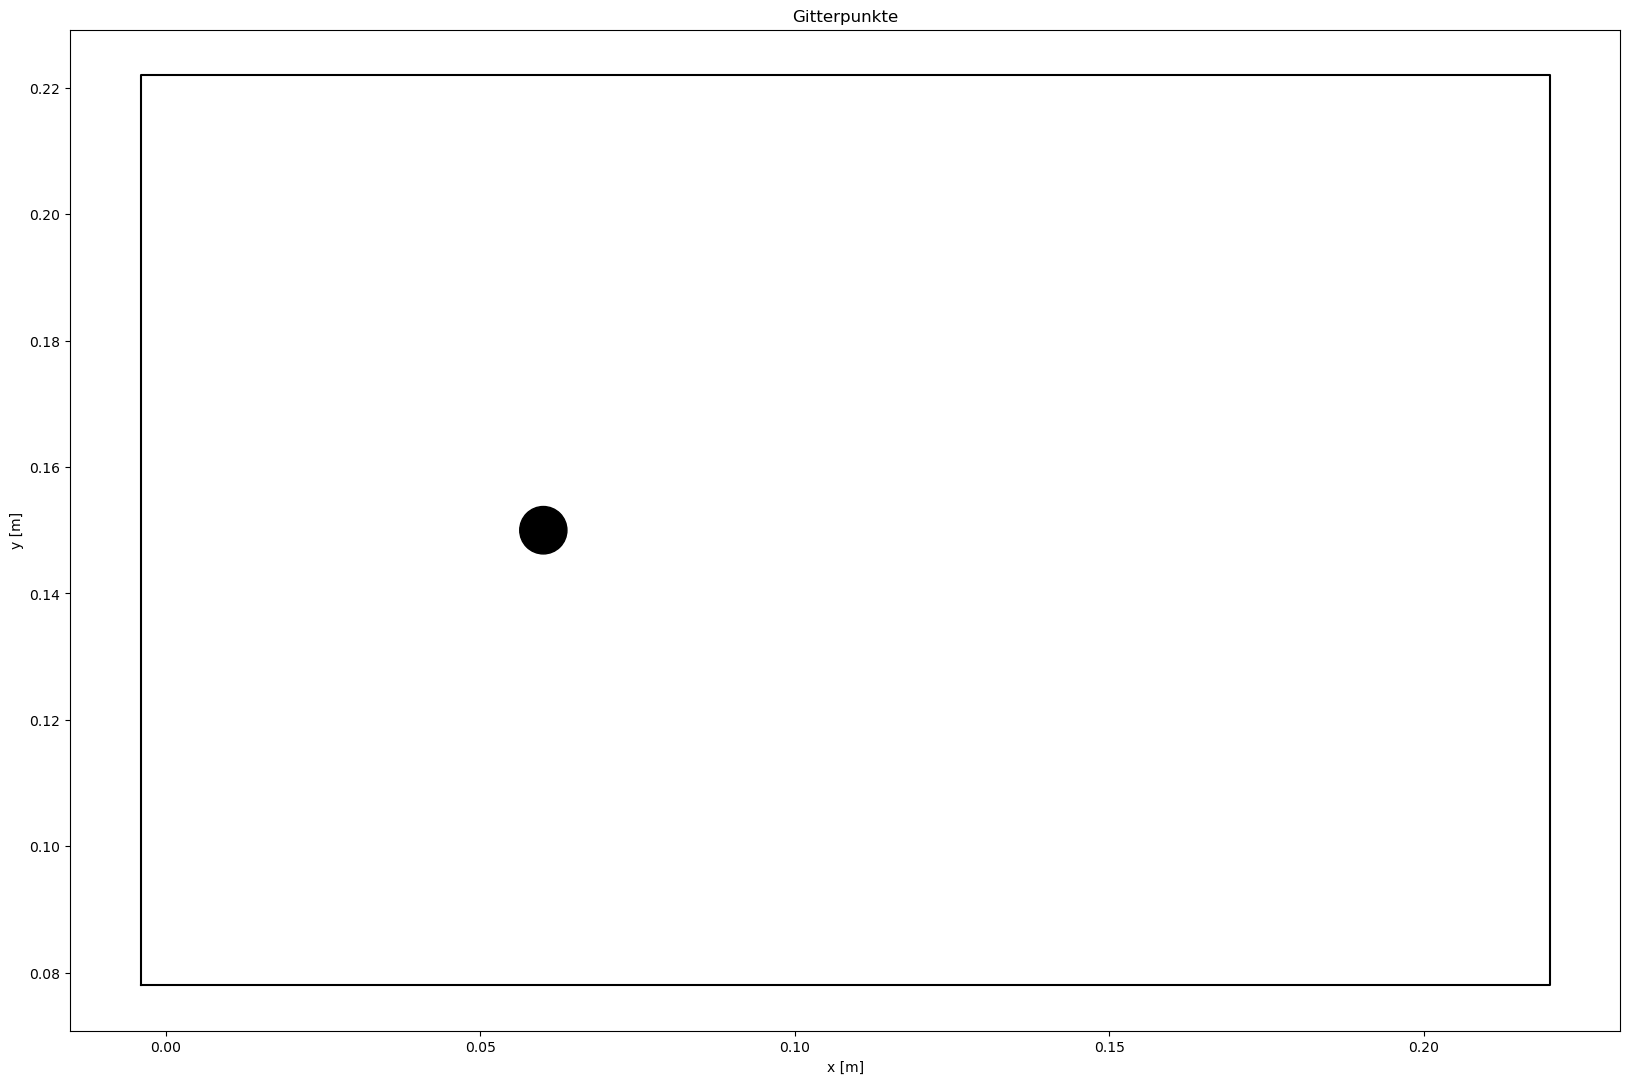

In [54]:
# Hier eigenen Code schreiben ...

# Minima und Maxima bestimmen
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

# Plot a Square from xmin, xmax, ymin, ymax 
def plot_square(xmin, xmax, ymin, ymax):
    # Plot 
    plt.figure(figsize=(20,13))
    plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'k-')
    
    # Schwarzen Kreis einzeichnen
    plt.gca().add_patch(create_circle("black"))
    
    # plt.xlim([xmin,xmax])
    # plt.ylim([ymin,ymax])
    
    # Beschriftungen
    plt.axis('equal')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.title('Gitterpunkte')
    
    
    plt.show()
    
plot_square(xmin, xmax, ymin, ymax)

In [55]:
# Hier sind einige Plausibilitätstests:
assert xmax-xmin == 0.224
assert (ymax-ymin)*1.5 < (xmax-xmin)


### 2) Gitter-Visualisierung $\qquad$_(2 Punkte)_

Vor der Auswertung der eigentlichen Daten soll zunächst die Gitterstruktur genauer untersucht werden.

**2.1) Plotten Sie die Gitterpunkte.** 

  * Zeichnen Sie alle Gitterpunkte in einem 20x13-Zoll-Plot unter Verwendung von `'.'`-Markern (kleine Punkte) mit einer Größe von 0.5.
  * Bestimmen Sie den Teilbereich des Gitters, der die Punkte enthält, die von stromauf gesehen _hinter_ dem Zylinder liegen bzw. von diesem verdeckt werden. _("Wie sieht der Schatten aus, wenn das Sonnenlicht von links kommt?")_
  * Wie viele der Punkte liegen in diesem Bereich? Speichern Sie die Anzahl in einer Variable `n_part`.
  * Zeichnen Sie die entsprechenden Gitterpunkte mit einer anderen Farbe in die ursprüngliche Abbildung ein.

_Hinweis: Um mehrere boolesche Ausdrücke in Arrays zu kombinieren, können die [bitweisen Operatoren](https://wiki.python.org/moin/BitwiseOperators) `&` (und) sowie `|` (oder) verwendet werden._

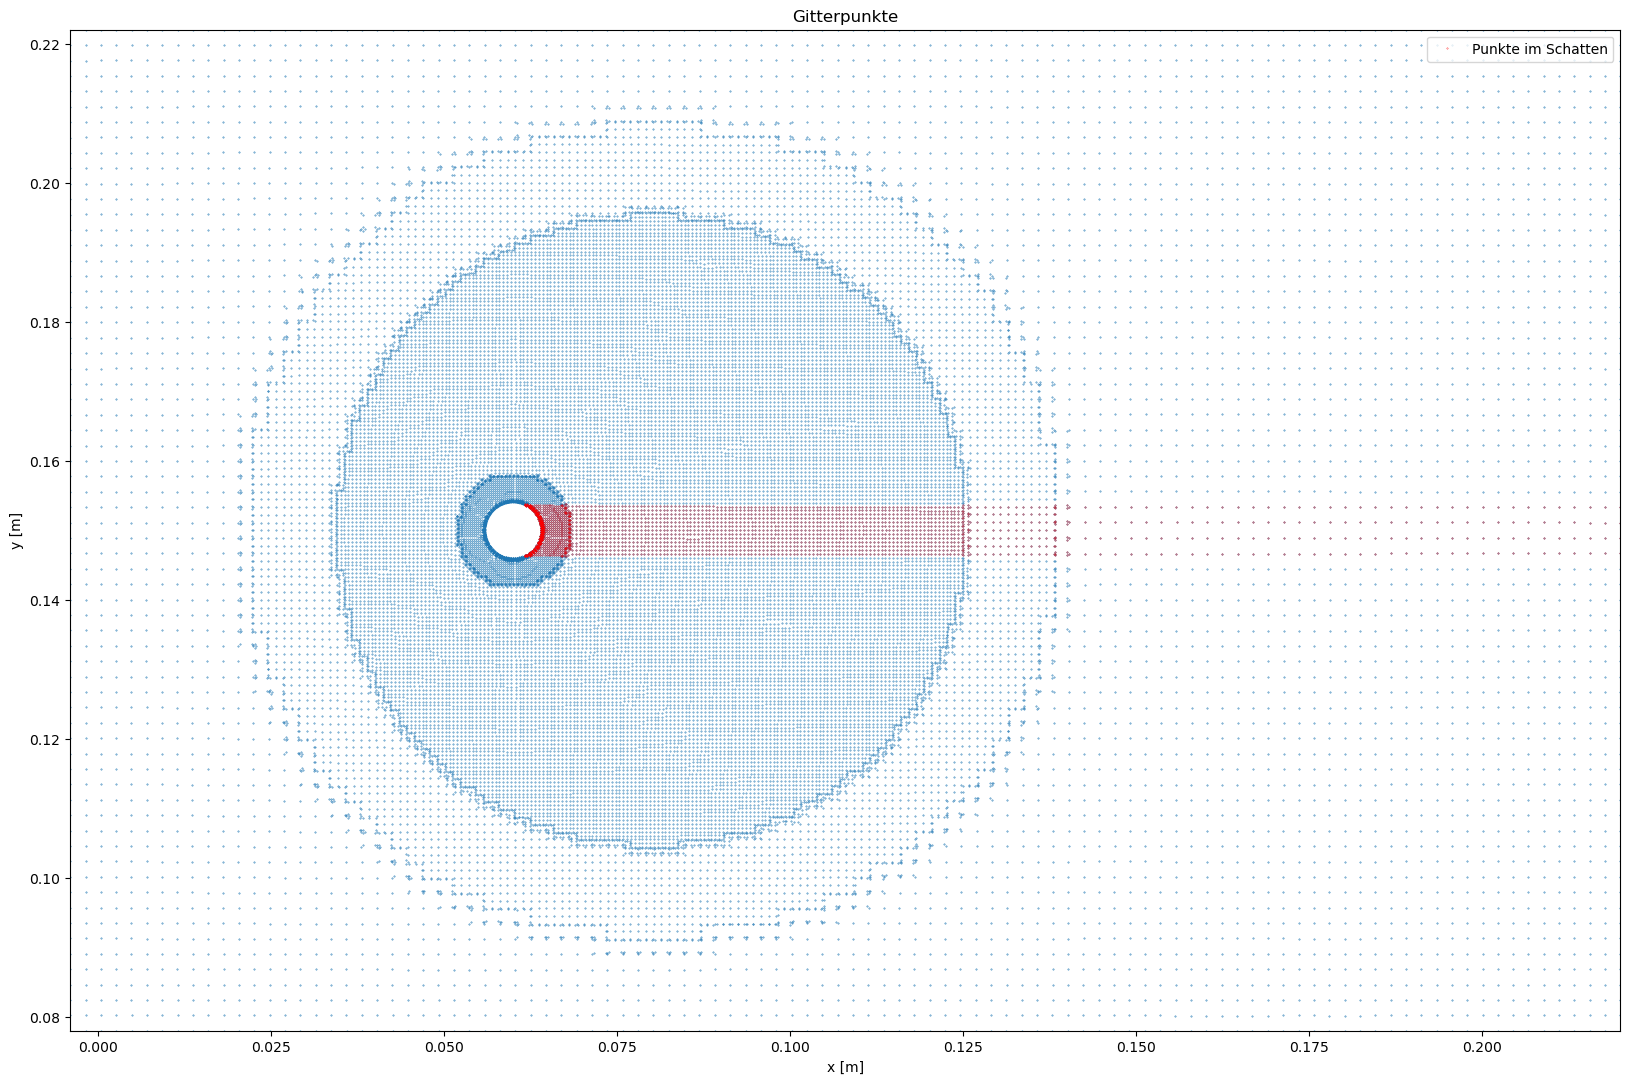

Number of points in the shadow: 2566


In [56]:
# Hier eigenen Code schreiben ...

# Plot 
plt.figure(figsize=(20,13))

# Punkte hinter dem Zylinder 
shadow_points = (x > zylinder_x) & (np.abs(y - zylinder_y) <= zylinder_radius)
n_part = shadow_points.sum()

plt.scatter(x, y, s=0.5, marker=".")# Alle Punkte 

# Plot der Punkte in einer anderen Farbe 
plt.plot(x[shadow_points], y[shadow_points], '.', 
         markersize=0.5, color='red', label='Punkte im Schatten')


# Kreis 
plt.gca().add_artist(create_circle())

# Achsenbeschriftungen 
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Gitterpunkte')
plt.legend()
plt.axis('equal')

# Relevanten Bereich eingrenzen
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

plt.show()

print(f"Number of points in the shadow: {n_part}")


In [57]:
# Hier ist ein Plausibilitätstest:
assert 500<n_part<5000

**2.2) Erstellen Sie für eine Quantifizierung der örtlichen Auflösung [Histogramme](https://de.wikipedia.org/wiki/Histogramm) der Gitterpunkte.** 

  * Untersuchen Sie die Ortsauflösung entlang $x$, $y$ sowie in Abhängigkeit vom Abstand zur Zylindermitte.
  * Verwenden Sie hierfür die matplotlib-Funktion [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).
  * Zeichnen Sie die drei Graphen nebeneinander (3 Plots in einer Zeile) und beschriften Sie sie korrekt.
  * Nutzen Sie für die Histogramme je 50 Bins ( = [Klassen](https://de.wikipedia.org/wiki/Histogramm#Einteilung_in_Klassen)) gleichen Umfangs.
  * Wie hoch ist die absolute Häufigkeit (Anzahl der Elemente) für die Bins mit den jeweils meisten Elementen (`n_x_max`, `n_y_max`, `n_r_max`)?


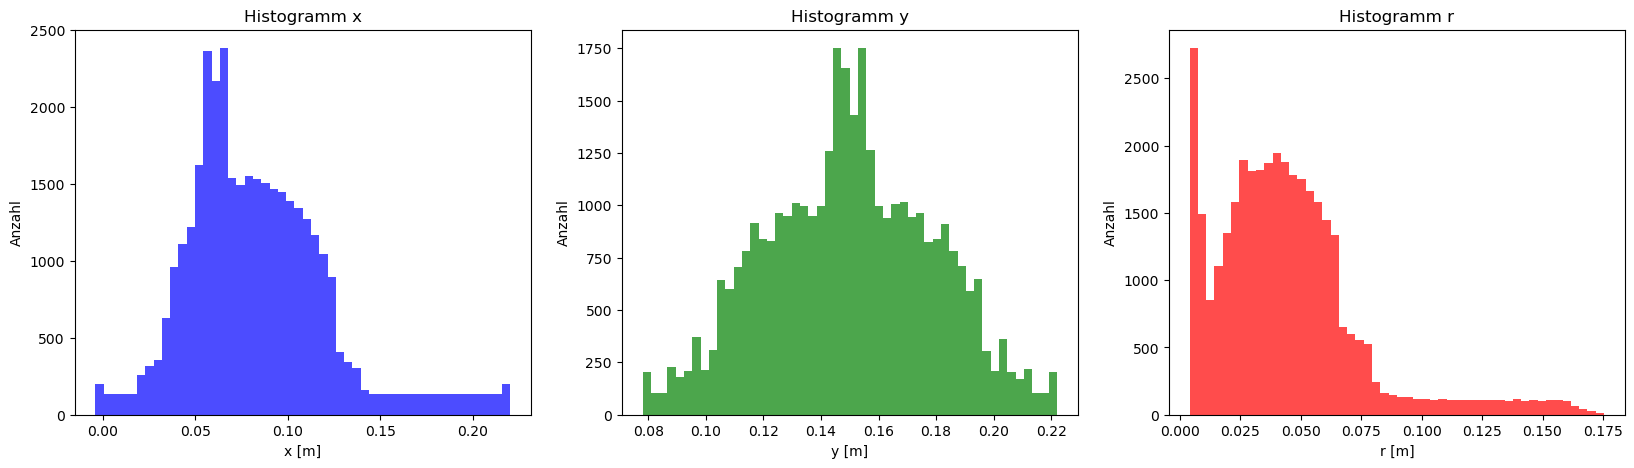

Number of elements in the bin with the most elements for x: 2382.0
Number of elements in the bin with the most elements for y: 1751.0
Number of elements in the bin with the most elements for r: 2725.0


In [58]:
# Hier eigenen Code schreiben ...

# Plot mit 3 subplots
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot 1: x
n_x, bins_x, patches_x = axs1.hist(x, bins=50, color='blue', alpha=0.7)
n_x_max = n_x.max()

# Plot 2: y
n_y, bins_y, patches_y = axs2.hist(y, bins=50, color='green', alpha=0.7)
n_y_max = n_y.max()

# Plot 3: r = sqrt(x² + y²)
r = np.sqrt((x - zylinder_x)**2 + (y - zylinder_y)**2)
n_r, bins_r, patches_r = axs3.hist(r, bins=50, color='red', alpha=0.7)
n_r_max = n_r.max()

# Achsenbeschriftungen
axs1.set_xlabel('x [m]')
axs1.set_ylabel('Anzahl')
axs1.set_title('Histogramm x')

axs2.set_xlabel('y [m]')
axs2.set_ylabel('Anzahl')
axs2.set_title('Histogramm y')

axs3.set_xlabel('r [m]')
axs3.set_ylabel('Anzahl')
axs3.set_title('Histogramm r')

plt.show()

# Anzahl der Elemente für die Bins mit den meisten Elementen
print(f"Number of elements in the bin with the most elements for x: {n_x_max}")
print(f"Number of elements in the bin with the most elements for y: {n_y_max}")
print(f"Number of elements in the bin with the most elements for r: {n_r_max}")


In [59]:
# Hier sind einige Plausibilitätstests:
assert 2345 < n_x_max > n_y_max < n_r_max > 2345

## 3) Strömungsgeschwindigkeiten $\qquad$_(2 Punkte)_

Nun sollen die im Datensatz auftretenden Geschwindigkeiten näher betrachtet werden.

**3.1) Färben Sie Teilbereiche je nach Geschwindigkeit unterschiedlich ein:**

 - Bestimmen Sie die mittlere Geschwindigkeit in y-Richtung (`v_avg`) und in z-Richtung (`w_avg`) sowie die maximalen und minimalen Geschwindigkeiten in x-Richtung `u_max` und `u_min`.
 - Plotten Sie die Punkte des Gitters basierend auf folgenden 4 Kriterien:
      1. Abweichung zur mittleren Strömungsgeschwindigkeit in $y$-Richtung _mindestens_ 2 m/s
      2. Abweichung zur mittleren Strömungsgeschwindigkeit in $z$-Richtung _mindestens_ 4 m/s
      3. weniger als 12 m/s Abweichung zur _Maximal_geschwindigkeit $x$-Richtung
      4. weniger als 24 m/s Abweichung zur _Minimal_geschwindigkeit $x$-Richtung

Betrachten Sie die Kriterien unabhängig voneinander.
Wählen Sie je nach Kriterium eine andere Farbe für die Punkte.
Achten Sie darauf, dass die Achsen [im gleichen Verhältnis skaliert](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html#) sind.

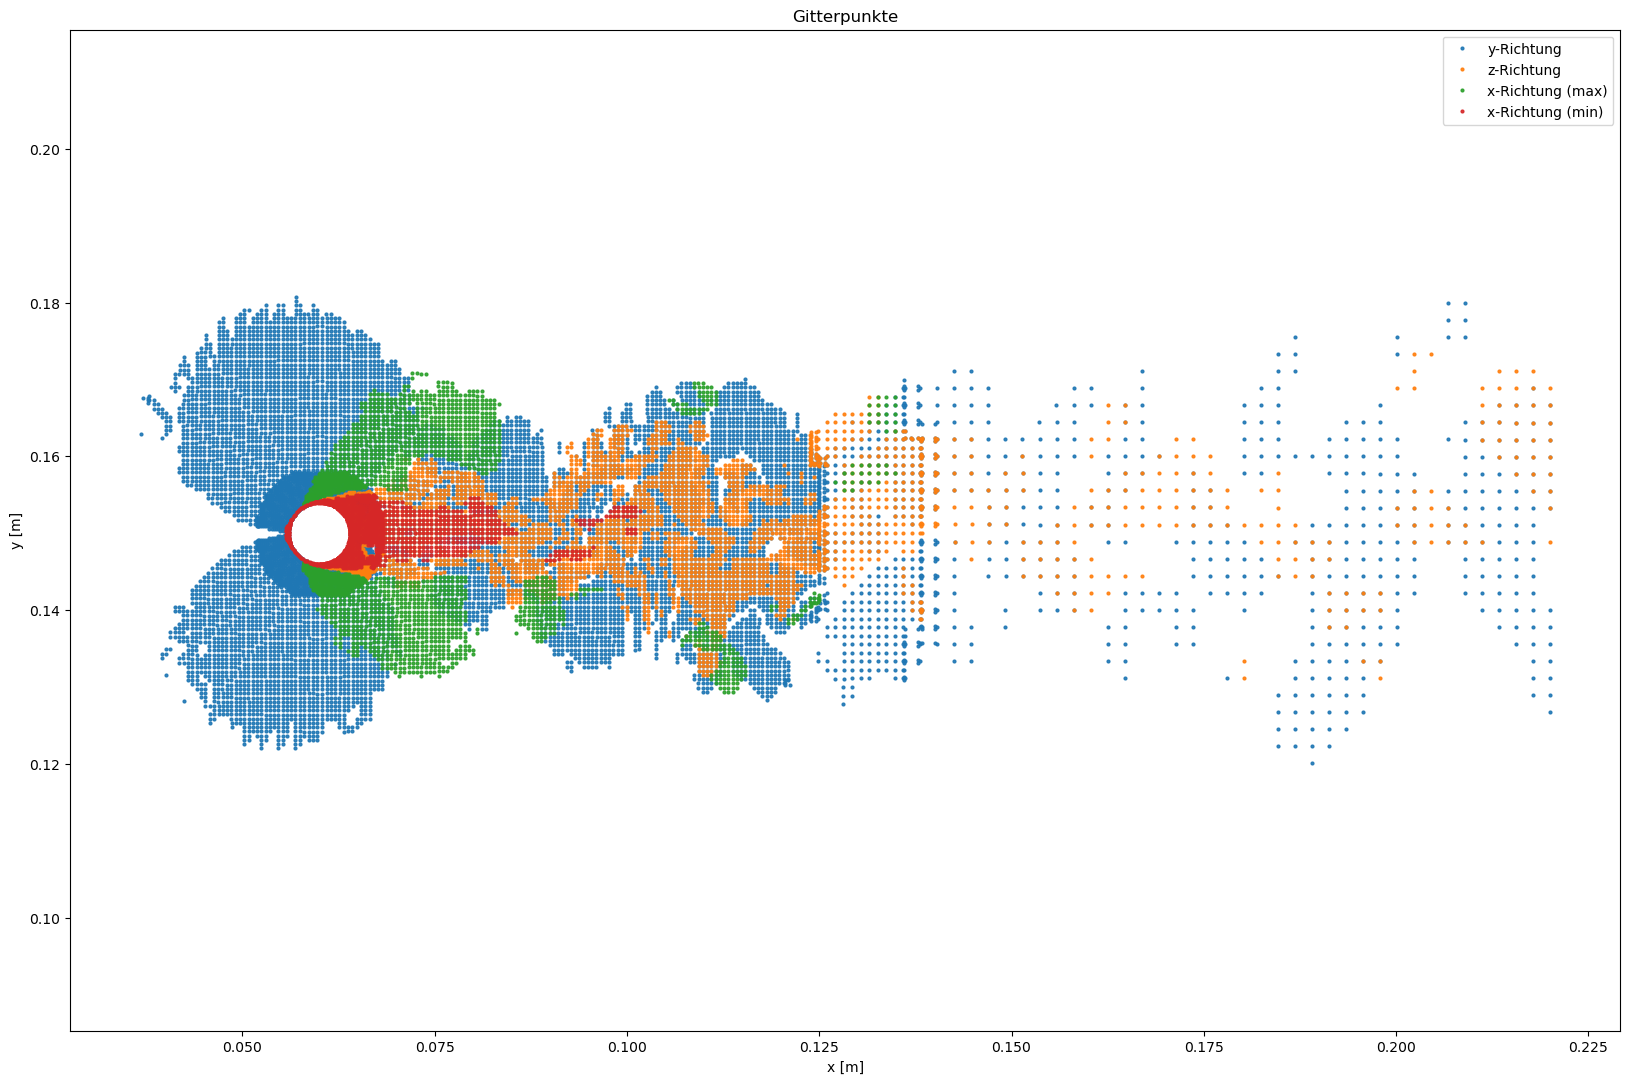

In [60]:
# Hier eigenen Code schreiben ...

# Mittlere Geschwindigkeiten und Extrema
v_avg, w_avg = v.mean(), w.mean()
u_max, u_min = u.max(), u.min()

# Punkte für verschiedene Richtungen
y_points = np.abs(v - v_avg) >= 2
z_points = np.abs(w - w_avg) >= 4
x_max_points = np.abs(u - u_max) < 12
x_min_points = np.abs(u - u_min) < 24

# Grenzen bestimmen
xlims = (x.min(), x.max())
ylims = (y.min(), y.max())

# Plot erstellen
plt.figure(figsize=(20,13))

# markersize und alpha
markersize = 4
alpha = 0.9

# Punkte für verschiedene Richtungen (analog zu oben)
plt.plot(x[y_points], y[y_points], '.', markersize=markersize, color="C0", alpha=alpha)
plt.plot(x[z_points], y[z_points], '.', markersize=markersize, color="C1", alpha=alpha)
plt.plot(x[x_max_points], y[x_max_points], '.', markersize=markersize, color="C2", alpha=alpha)
plt.plot(x[x_min_points], y[x_min_points], '.', markersize=markersize, color="C3", alpha=alpha)

# Zylinder einzeichnen
plt.gca().add_patch(create_circle())

# Plot formatieren
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Gitterpunkte')
plt.axis('equal')
plt.legend(['y-Richtung', 'z-Richtung', 'x-Richtung (max)', 'x-Richtung (min)'])

plt.show()

In [61]:
# Hier sind einige Plausibilitätstests:
assert u_min < 0 < w_avg < 30 < u_max < 60

**3.2) Visualisieren Sie die Strömung in unterschiedlichen Plotvarianten.** 

  * Berechnen Sie die Geschwindigkeitsbeträge ([Länge der Geschwindigkeitsvektoren](https://de.wikipedia.org/wiki/Euklidische_Norm)) `u_mag` an den Gitterpunkten.
  * Erzeugen Sie drei Visualisierungen der errechneten Werte:
      1. Mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte (Punktgröße 0.5)
      2. Mithilfe der [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html)-Funktion mit 8 Farblevels
      3. Mithilfe der [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)-Funktion und Farbskalierung der Werte (Punktgröße 0.5). Im Unterschied zur kartesischen Darstellung in Plot 1 soll hier Abstand und [Winkel](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) relativ zur Zylindermitte bestimmt und die Winkelposition auf die x-Achse und der Abstand auf die y-Achse projiziert werden.
    
  * Zeichnen Sie bei Plot 1 und 2 den Zylinderkreis in weißer Farbe mit ein.
  * Fügen Sie jeweils einen [Colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) hinzu, damit die Farben Geschwindigkeitswerten zugeordnet werden können.

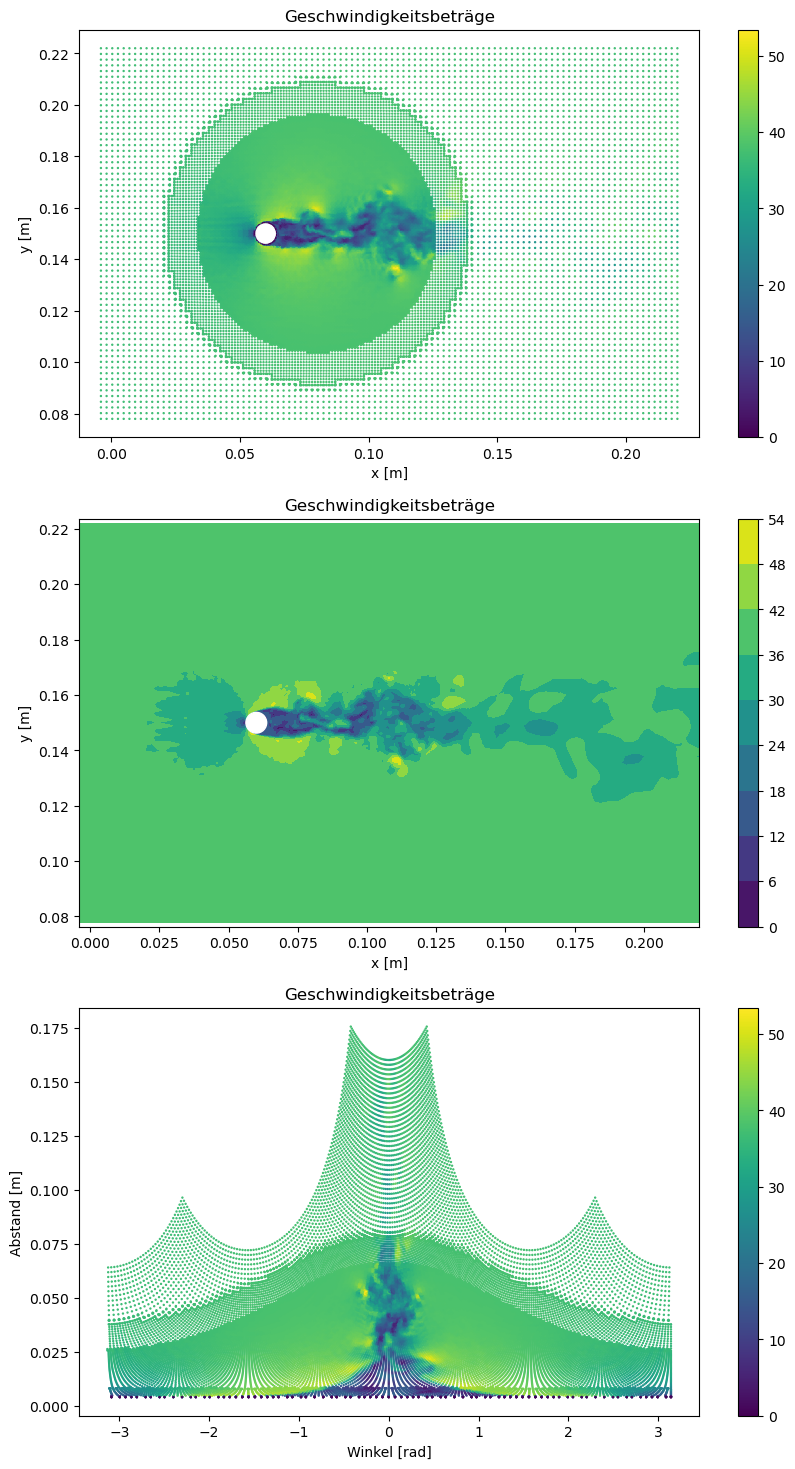

In [62]:
plt.figure(5,(10,18))
plt.subplot(311)
# Hier eigenen Code schreiben ...

# Geschwindigkeitsbeträge berechnen
u_mag = np.sqrt(u**2 + v**2 + w**2)

# Plot 1: scatter plot
plt.scatter(x, y, c=u_mag, s=0.5)
plt.gca().add_patch(create_circle())

# Achsenbeschriftungen
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Geschwindigkeitsbeträge')
plt.axis('equal')
plt.colorbar()

# Plot 2: tricontourf plot

# Hier wurde uns in einem Gespräch mit dem Tutor mitgeteilt, dass die Anzahl der Levels größer oder gleich 8 sein soll.
# Wir haben angenommen, dass die Anzahl der Levels auch 9 sein kann, und danach die Lösung implementiert (siehe Möglichkeit 2). 
# Falls exakt 8 Levels gefordert sind, können wir dies auch implementieren (siehe Möglichkeit 1).

# Möglichkeit 1: Mit linspace werden intervalle von min bis max erstellt in regelmäßigen Abständen
# levels = np.linspace(np.min(u_mag), np.max(u_mag), 9)  # Führt zu 8 levels

# Möglichkeit 2: levels = 8 definieren, führt allerdings zu 9 levels 
levels = 8

plt.subplot(312)
contours = plt.tricontourf(x, y, u_mag, levels=levels)
plt.gca().add_patch(create_circle())

# Achsenbeschriftungen
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Geschwindigkeitsbeträge')
plt.axis('equal')
plt.colorbar()

# Plot 3: scatter plot mit Winkel und Abstand
plt.subplot(313)
r = np.sqrt((x - zylinder_x)**2 + (y - zylinder_y)**2)
phi = np.arctan2(y - zylinder_y, x - zylinder_x)
plt.scatter(phi, r, c=u_mag, s=0.5)

# Achsenbeschriftungen
plt.xlabel('Winkel [rad]')
plt.ylabel('Abstand [m]')
plt.title('Geschwindigkeitsbeträge')
plt.colorbar()

plt.show()

assert len(contours.levels) -1 >= 8 # Anzahl der Levels soll größer oder gleich 8 sein.

In [63]:
# Hier sind einige Plausibilitätstests:
assert u_mag.shape == u.shape
assert int(u_mag.mean()) == 35

## 4) Regelmäßiges Gitter  $\qquad$_(2 Punkte)_

Daten, die auf einem regelmäßigen Gitter vorliegen, lassen sich häufig vielfältiger verarbeiten und visualisieren.
Um diesen Vorteil ausnutzen zu können, sollen nun die auf einenm unregelmäßgen Gitter vorliegenden Daten auf ein regelmäßiges Gitter projiziert bzw. interpoliert werden.

Praktischerweise enthält das SciPy-Modul mit [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) eine Funktion, die unregelmäßige Daten auf ein regelmäßiges Gitter abbilden kann.
Um ein Gitter mit regelmäßigen Abständen zu erzeugen, kann zum Beispiel die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) zusammen mit [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) (beide aus dem NumPy-Modul) verwendet werden.

**Erzeugen Sie ein Gitter mit regelmäßigen Abständen und interpolieren Sie die unregelmäßig verteilten Geschwindigkeitsdaten auf dieses Gitter.**

  * Verwenden Sie die Funktion [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) und speichern Sie die Gitterkoordinaten in den Variablen `gx` bzw. `gy`.
  * Das neue Gitter sollte eine Schrittweite von $10^{-4}\,$m haben (sowohl in $x$- als auch in $y$-Richtung) und den Simulationsbereich beinhalten.
  * Interpolieren Sie $u$, $v$ und $w$ jeweils separat, sodass Sie drei neue (große) Arrays erhalten.
  * Berechnen Sie aus diesen Arrays ein Array `inter_u_mag`, das die Geschwindigkeitsbeträge enthält.
  * Zur Überprüfung, ob alles korrekt funktioniert hat, visualisieren Sie `inter_u_mag` mithilfe von [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Setzen Sie den Parameter `vmax` auf einen sinnvollen Wert.
      * Tragen Sie im Parameter `extent` den tatsächlichen Umfang des Gitters ein.
      * Zeichnen Sie auch hier den weißen Kreis an die passende Position.
      * Achten Sie auf die korrekte Ausrichtung der Grafik.
  

_Hinweis: Wenn Sie sich der Leistungsfähigkeit Ihres Computers nicht sicher sind, beginnen Sie mit einer gröberen Schrittweite._

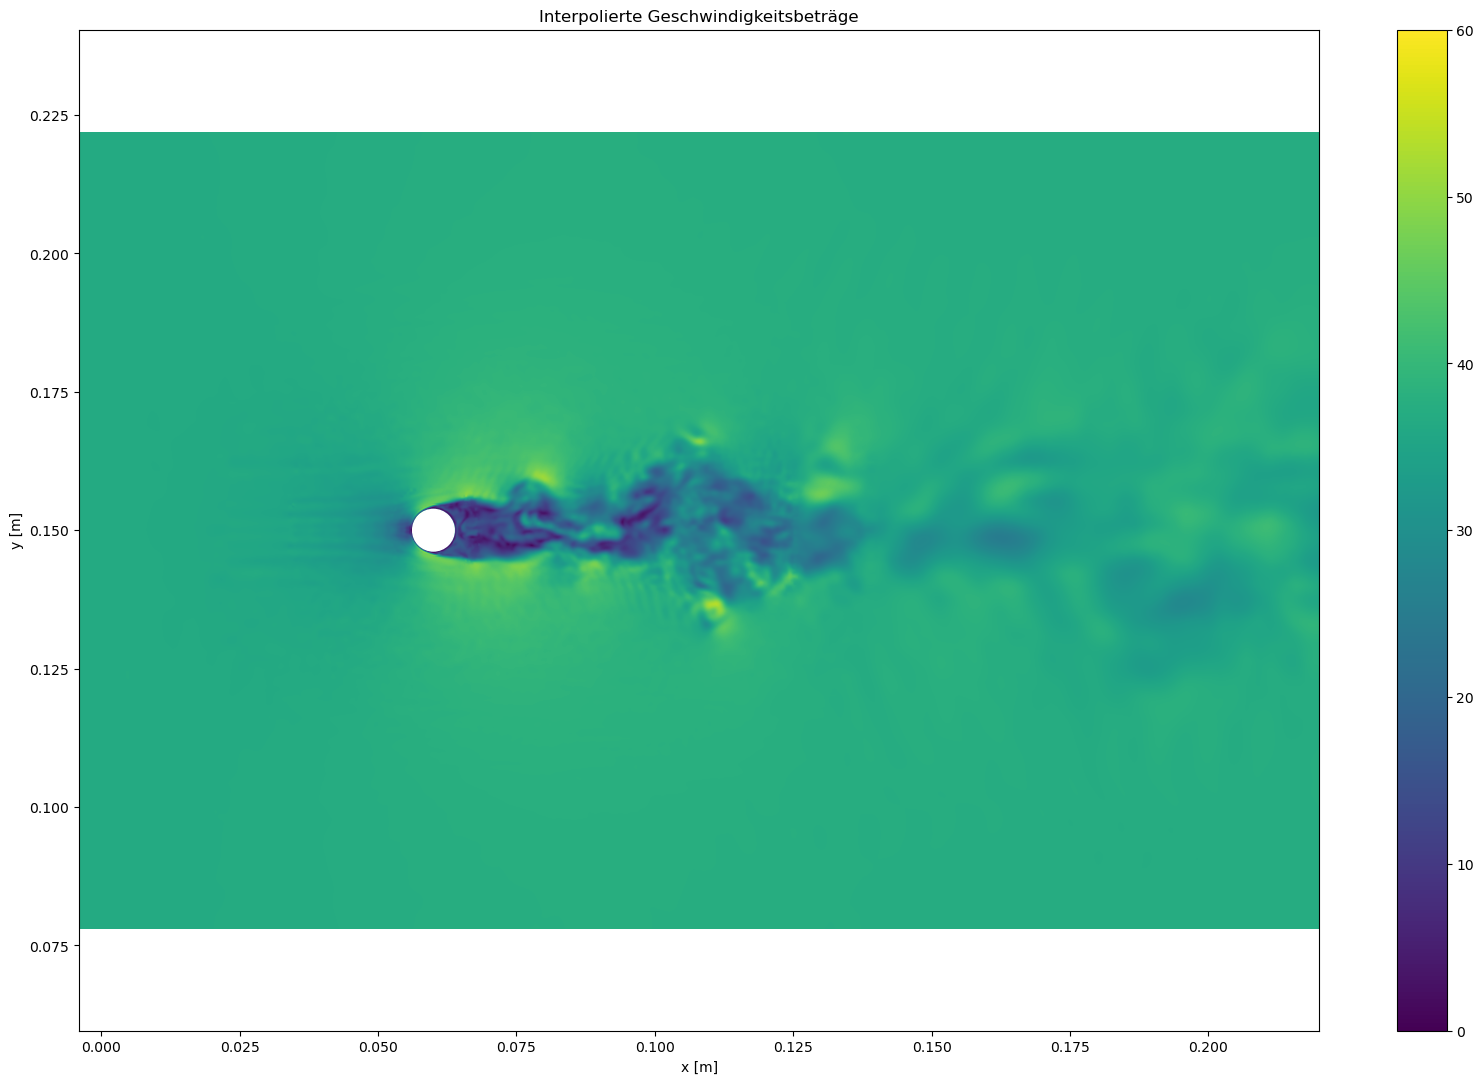

In [64]:
from scipy.interpolate import griddata # Vorschlag für Interpolationsmethode für sanfte Übergänge: "cubic"
# Hier eigenen Code schreiben ...

# Schrittweite
dx = 1e-4
dy = 1e-4

# Gitterpunkte mit Abstand 1e-4 erstellen
grid_x = np.arange(xmin, xmax + dx, dx)
grid_y = np.arange(ymin, ymax + dy, dy)
gx, gy = np.meshgrid(grid_x, grid_y)

# Interpolation für jede Komponente 
inter_u = griddata((x, y), u, (gx, gy), method='cubic')
inter_v = griddata((x, y), v, (gx, gy), method='cubic')
inter_w = griddata((x, y), w, (gx, gy), method='cubic')

# Geschwindigkeitsbeträge berechnen
inter_u_mag = np.sqrt(inter_u**2 + inter_v**2 + inter_w**2)

# Plot 
plt.figure(figsize=(20,13))

# imshow plot
extent = [xmin, xmax, ymin, ymax]
plt.imshow(inter_u_mag, vmax=60, extent=extent, origin='lower')

# Weißer Kreis für den Zylinder
plt.gca().add_patch(create_circle())

# Colorbar hinzufügen
plt.colorbar()


# Labels 
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Interpolierte Geschwindigkeitsbeträge')
plt.axis('equal')

plt.show()


In [65]:
# Hier sind einige Plausibilitätstests:
assert gx.shape == gy.shape == inter_u_mag.shape
assert len(gx.shape) == 2
assert gx.shape[1]-gx.shape[0] == 800


## 5) Wirbelstärke  $\qquad$_(2 Punkte)_

Um "interessante" Regionen in einem Strömungsfeld zu identifizieren, wird häufig die [Wirbelstärke](https://de.wikipedia.org/wiki/Wirbelst%C3%A4rke) verwendet, die nun berechnet werden soll. 
Hier genügt die Berechnung in 2D, d.h. die Wirbelstärke in $z$-Richtung. Diese ist wie folgt definiert:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}\tag{1}
$$

Offenbar werden die partiellen Ableitungen der Geschwindigkeiten benötigt. 
Diese waren in der Datendatei jedoch nicht enthalten und müssen demzufolge aus verfügbaren Daten berechnet werden. 
Da nur diskrete Werte vorliegen, muss die Ableitung über den [Differenzenquotienten](https://de.wikipedia.org/wiki/Differenzenquotient) erfolgen. 

Mit den nun auf einem regelmäßigen Gitter vorliegenden Daten können die partiellen Ableitungen einfach approximiert werden über

$$
    \frac{\partial v_{i,j}}{\partial x} \approx \frac{v_{i,j+1}-v_{i,j}}{\Delta x} \tag{2}
$$

und

$$
    \frac{\partial u_{i,j}}{\partial y} \approx \frac{u_{i,j}-u_{i+1,j}}{\Delta y}~.\tag{3}
$$

Die Indizes zählen von $i=0\ldots N_\text{Zeilen}-1$ bzw. $j=0\ldots N_\text{Spalten}-1$. Man beachte, dass Gleichung (3) für den Fall formuliert ist, dass ein geringerer Zeilenindex für einen höheren $y$-Wert steht. Sollte das in Ihrer Lösung nicht der Fall sein, sollten Sie für eine korrekte Lösung auch die Formel entsprechend anpassen.

**Berechnen Sie die Ableitungen und die Wirbelstärken $\omega_z$ entsprechend Gleichung (1). Visualisieren Sie die Wirbelstärken `omega_z` mit _imshow()_.**
  
  * Wählen Sie eine divergierende [Colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) und stellen Sie sicher, dass der Wert 0 darin weiß dargestellt wird.
  * Zeichnen Sie auch hier den weißen Zylinderkreis ein.
  * Setzen Sie den dargestellten Wertebereich so, dass der Plot informativ ist.
  * Fügen Sie einen Colorbar hinzu.

_Hinweis: Versuchen Sie, effizienten Code zu schreiben! Diese Berechnung sollte nicht allzu lange dauern (vielleicht einige wenige Sekunden). Erhöhen Sie zu Testzwecken die Schrittweite, falls erforderlich._

In [66]:
# Hier eigenen Code schreiben ...

# Abstand der Gitterpunkte wird aus der Initialisierung des regelmäßigen Gitters entnommen
dx = dy = grid_x[1]-grid_x[0]
assert np.isclose(dx, grid_x[1]-grid_x[0])

# Ableitungen
dv_dx = np.zeros_like(inter_v) # Array mit Nullen initialisieren
dv_dx[:, :-1] = np.diff(inter_v, axis=1) / dx # Fülle alle Spalten bis auf die letzte mit den Differenzen

du_dy = np.zeros_like(inter_u) # Array mit Nullen initialisieren
du_dy[:-1, :] = np.diff(inter_u, axis=0) / dy # Fülle alle Zeilen bis auf die letzte mit den Differenzen

# Wirbelstärke berechnen
omega_z = dv_dx - du_dy

# In einem Gespräch mit dem Tutor wurde festgestellt, dass unsere Berechnungen eine minimale Abweichung für den Wert: 
# np.nanmax(omega_z)-np.nanmin(omega_z) aufweisen. Wir haben damals einen Wert von 873476.8070742774 erhalten.
# Der Tutor hat uns darauf hingewiesen, dass der richtige Wert 873476.80707427XX ist und nicht weit entfernt von unserem Wert liegt.

# Assert mit kleinen Abweichungen über np.isclose
assert np.isclose(np.nanmax(omega_z)-np.nanmin(omega_z), 873476.8070742786)
# Assert mit exakten Werten
assert np.nanmax(omega_z)-np.nanmin(omega_z) == 873476.8070742786


# Visualisierung
plt.figure(figsize=(20,13))

# Weißer Kreis für den Zylinder
plt.gca().add_patch(create_circle())


plt.imshow(omega_z, 
          extent=[xmin, xmax, ymin, ymax],
          origin='lower',
          cmap='seismic',  
          vmin=-60000,  # Symmetrischer Wertebereich um 0
          vmax=60000)



# Colorbar hinzufügen
plt.colorbar(label='Wirbelstärke ω_z [1/s]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wirbelstärke ω_z')
plt.show()

AssertionError: 

In [ ]:
# Hier sind einige Plausibilitätstests:
assert np.abs(np.nanmean(omega_z))<10, 'Einheiten in Ordnung?'
assert 8e5<np.nanmax(omega_z)-np.nanmin(omega_z)<10e5, 'Anordnung der Zeilen korrekt interpretiert?'